# Exercise 4 - Data preparation, model training and evaluation

Necessary libraries are being loaded.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the customer data again and enter the first lines.

In [54]:
# We have decided to use here the already discretized data we stored during the previous exercise, 
# to avoid double work during this manoeuvre.
df = pd.read_csv('discrating_data.csv')
df

,year,month,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,weekday,daytime,isHoliday,distance,count,total
0,2021,3,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,Di,morning,Keine Ferien,medium,high,medium
1,2021,3,Turda,80982,3241013050002,Turda,80982,3241013050008,Mi,afternoon,Keine Ferien,low,medium,low
2,2021,3,Turda,80982,3241013050007,Turda,80982,3241013030001,Sa,morning,Keine Ferien,medium,medium,medium
3,2021,3,Bran,91157,3254028001012,Bran,91157,3254028001004,Fr,afternoon,Keine Ferien,low,high,low
4,2021,3,Bran,91157,3254028001003,Turda,80982,3241013070001,Fr,night,Keine Ferien,high,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,2020,10,Turda,80982,3241013050001,Turda,80982,3241013080001,Sun,afternoon,Keine Ferien,high,low,medium
265482,2020,10,Bran,91157,3254028001012,Bran,91157,3254028001003,Mo,morning,Ferien,low,high,low
265483,2020,10,Bran,91157,3254028001013,Bran,91157,3254028003001,Di,morning,Keine Ferien,medium,medium,medium
265484,2020,10,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,Mo,night,Keine Ferien,high,low,medium


In [3]:
df = pd.read_csv('discrating_data.csv')
df

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45
1,Mi,17,Keine Ferien,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0
2,Sa,11,Keine Ferien,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30
3,Fr,13,Keine Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0
4,Fr,18,Keine Ferien,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,Sun,17,Keine Ferien,5,5,Turda,80982,3241013050001,Turda,80982,3241013080001,2020,10,25
265482,Mo,9,Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001003,2020,10,0
265483,Di,9,Keine Ferien,2,10,Bran,91157,3254028001013,Bran,91157,3254028003001,2020,10,20
265484,Mo,18,Keine Ferien,5,5,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,2020,10,25


## 4.1 Business Understanding: What is your target variable?

The aim is to develop a model that finds the customers with the highest revenue for the company. It is determined that a customer is considered to have the highest revenue if the total revenue is over 300.

For this purpose, a new attribute "high revenue" is to be calculated using the total revenue of a customer "total_sum". If the threshold value of 300 is exceeded, "high revenue" is marked with "1", otherwise "0". You can use the numpy function np.where(condition,if true, if false) for this.

Add the column "high revenue" to the data set and check the result.

1. Business Understanding
Objective
Classification: Predict whether a data item belongs to a particular class.
Regression: Predict a continuous variable (e.g. distance or daytime).
  how targert variable will be total (we see this variable as the total price of a travel)
Classification : Transformer total as :
low  : total <= 50
medium  : 50 < total <= 200
high  : total > 200

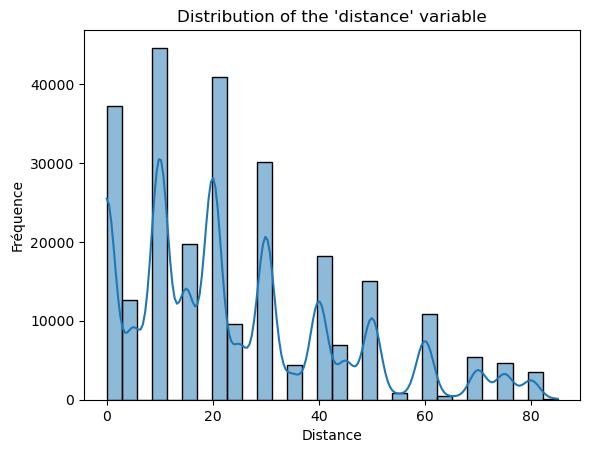

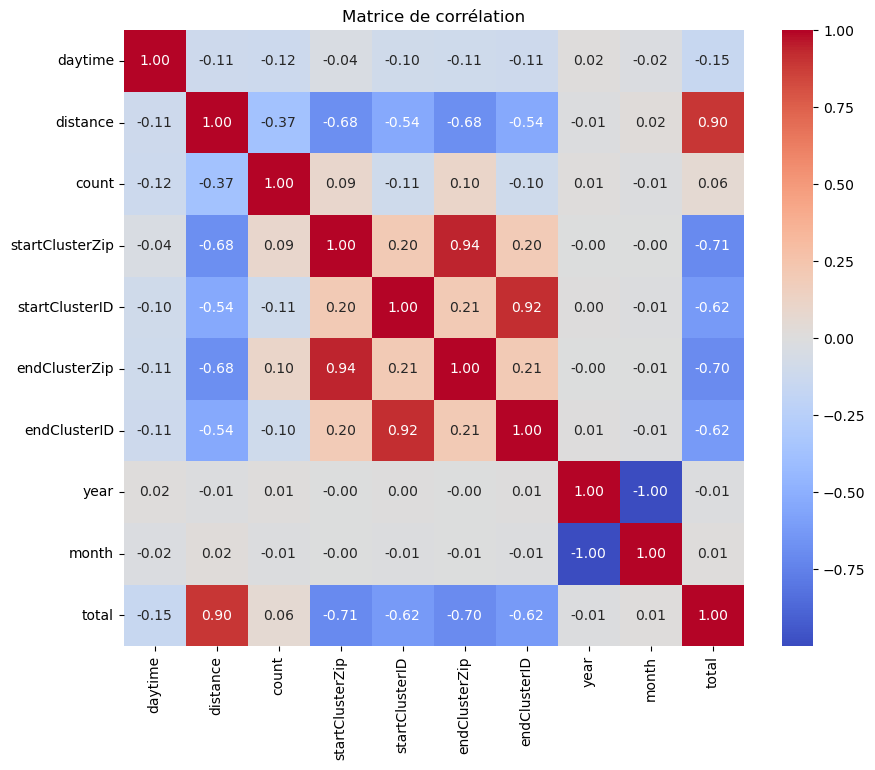

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de 'distance'
sns.histplot(df['total'], kde=True, bins=30)
plt.title("Distribution of the 'distance' variable")
plt.xlabel("Distance")
plt.ylabel("Fréquence")
plt.show()

# correlations matrix
dfCorr = df.corr(numeric_only= True)
correlation_matrix = dfCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [ ]:

df['total_categories'] = df['total']

df['total'] = np.where(df['total']=='low', 0, 
                               np.where(df['total']=='medium', 1, 2))
df['count'] = np.where(df['count']=='low', 0, 
                               np.where(df['count']=='medium', 1, 2))
df['distance'] = np.where(df['distance']=='low', 0, 
                               np.where(df['total']=='medium', 1, 2))

df

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total,total_categories
0,Di,7,Keine Ferien,2,2,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,2,45
1,Mi,17,Keine Ferien,2,2,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,2,0
2,Sa,11,Keine Ferien,2,2,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,2,30
3,Fr,13,Keine Ferien,2,2,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,2,0
4,Fr,18,Keine Ferien,2,2,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,Sun,17,Keine Ferien,2,2,Turda,80982,3241013050001,Turda,80982,3241013080001,2020,10,2,25
265482,Mo,9,Ferien,2,2,Bran,91157,3254028001012,Bran,91157,3254028001003,2020,10,2,0
265483,Di,9,Keine Ferien,2,2,Bran,91157,3254028001013,Bran,91157,3254028003001,2020,10,2,20
265484,Mo,18,Keine Ferien,2,2,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,2020,10,2,25


## 4.2 Distribution of the target variable

First of all, we want to know how "high revenue" is distributed in the data.

To do this, the values of "high revenue" are counted using the groupby function and displayed as a bar chart.

<Axes: xlabel='total'>

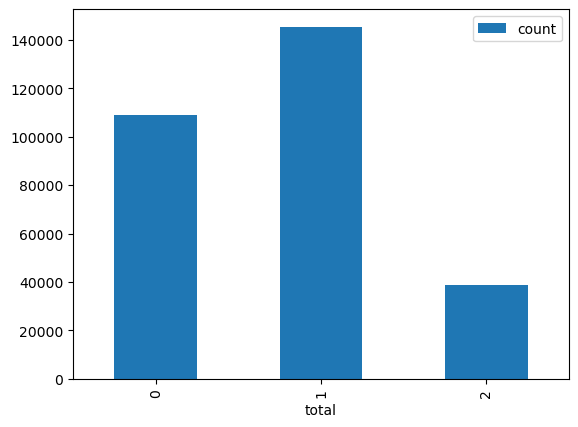

In [31]:
bc = df.groupby('total').agg({'count':'sum'})

bc.plot.bar()

## 4.3 Data reduction & cleansing

With regard to data understanding, the department was consulted and it was determined that not all existing attributes are relevant. Only the following should be used in the data set:


we did'nt choose to delete an attribut because all of them are usefull for our model's training

This is followed by df cleansing. Display the missing values and carry out the following data cleansing steps:

1. Replace missing values (NaN) with the most common value (dfClean['Attribute'].mode()[0])
The result should be in the variable dfClean.

In [32]:
# space
print(df.isnull().sum())

year                0
month               0
startClusterName    0
startClusterZip     0
startClusterID      0
endClusterName      0
endClusterZip       0
endClusterID        0
weekday             0
daytime             0
isHoliday           0
distance            0
count               0
total               0
total_categories    0
dtype: int64


In the data transformation, we want to perform an encoding into numerical values (even if we do not have ordinal attributes here). We use the LabelEncoder() for this. Apply this to user_agent_os and user_agent_brand as well and see how useful you find the result.

In [33]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

dfPrepared = df.copy()

labelenc.fit(dfPrepared.weekday)
dfPrepared['weekday'] = labelenc.transform(dfPrepared.weekday)
labelenc.fit(dfPrepared.startClusterName)
dfPrepared['startClusterName'] = labelenc.transform(dfPrepared.startClusterName)
labelenc.fit(dfPrepared.endClusterName)
dfPrepared['endClusterName'] = labelenc.transform(dfPrepared.endClusterName)
labelenc.fit(dfPrepared.daytime)
dfPrepared['daytime'] = labelenc.transform(dfPrepared.daytime)
labelenc.fit(dfPrepared.isHoliday)
dfPrepared['isHoliday'] = labelenc.transform(dfPrepared.isHoliday)
dfPrepared.to_csv('prepared_data2.csv', index=False)

dfPrepared

,year,month,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,weekday,daytime,isHoliday,distance,count,total,total_categories
0,2021,3,1,71171,3254026000002,1,71171,3254026000007,0,1,1,2,2,1,medium
1,2021,3,2,80982,3241013050002,2,80982,3241013050008,3,0,1,0,1,0,low
2,2021,3,2,80982,3241013050007,2,80982,3241013030001,5,1,1,2,1,1,medium
3,2021,3,0,91157,3254028001012,0,91157,3254028001004,2,0,1,0,2,0,low
4,2021,3,0,91157,3254028001003,2,80982,3241013070001,2,2,1,2,1,2,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,2020,10,2,80982,3241013050001,2,80982,3241013080001,6,0,1,2,0,1,medium
265482,2020,10,0,91157,3254028001012,0,91157,3254028001003,4,1,0,0,2,0,low
265483,2020,10,0,91157,3254028001013,0,91157,3254028003001,0,1,1,2,1,1,medium
265484,2020,10,1,71171,3254026000014,1,71171,3254026000003,4,2,1,2,0,1,medium


## 4.4 Splitting into training & test data
The target attribute is separated from the data frame. Training and test data are split in a ratio of 70:30. Using the "stratify" option, the distribution of the target attribute is identical to that in the source data.

In [34]:
from sklearn.model_selection import train_test_split

# Définir la variable cible et les prédicteurs
y_classification = dfPrepared['total_categories']
y_regression = dfPrepared['total']
X = dfPrepared.drop(['total'], axis=1).drop(['total_categories'], axis=1)


# Séparation des données pour la classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.3, random_state=101, stratify=y_classification)

# Séparation des données pour la régression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, random_state=101)


In [35]:
# from sklearn.model_selection import train_test_split

# x = dfPrepared.drop(['total'], axis = 1)
# y = dfPrepared['total']

# x_train, x_test, y_train, y_test = train_test_split(x, y,
#                                     random_state = 101, stratify = y, test_size = 0.2)

## 4.5 Decision Tree model
For example, a decision tree is trained with the split data set and then evaluated on the test data. 

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Entraîner le modèle
dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train_class, y_train_class)

# Prédictions
y_pred_class = dt_classifier.predict(X_test_class)



In [37]:
# from sklearn.tree import DecisionTreeClassifier

# dt_model = DecisionTreeClassifier(random_state = 10)
# dt_model.fit(x_train, y_train)

# y_pred = dt_model.predict(x_test)


## 4.6 Evaluation of the model
This is followed by the evaluation of the model on the test data.

In [38]:
from sklearn.metrics import classification_report

# Évaluation
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

        high       0.48      0.16      0.24      7579
         low       0.85      0.91      0.88     34238
      medium       0.78      0.83      0.80     37829

    accuracy                           0.80     79646
   macro avg       0.70      0.63      0.64     79646
weighted avg       0.78      0.80      0.78     79646

Confusion Matrix:
 [[ 1220   414  5945]
 [    0 31269  2969]
 [ 1319  5135 31375]]


The absolute distribution is shown in the form of a confusion matrix.

In [39]:
# from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test, y_pred))

How would you rate the quality of the model?

# 4.6.1 Error Rate

Now we want to calculate the error rate of our classifier. You can simply calculate it using the confusion matrix (we simply add up the misclassified ones and divide by n) or with y_pred and y_test.

In [40]:
# simple logic but more lines of code
# X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
#     X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# False positives are generally the value in the first row, second column of the confusion matrix
false_positives = cm[0, 1]

# False negatives are generally the value in the second row, first column of the confusion matrix
false_negatives = cm[1, 0]

# Add up false positives and false negatives
total_errors = false_positives + false_negatives

# Calculate the total number of predictions
total_predictions = cm.sum()

# Calculate the error rate
error_rate = (total_errors / total_predictions) * 100

print(f"Error rate: {error_rate:.2f}%")

Error rate: 0.52%


In [42]:
# also possible, less lines of code
# Calculate the number of incorrect predictions
incorrect_predictions = (y_pred_class != y_test_class).sum()

# Calculate the total number of predictions
total_predictions = y_test_class.shape[0]

# Calculate the error rate
error_rate = (incorrect_predictions / total_predictions) * 100

print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 19.82%


# 4.6.2 derive information from the confusion matrix

We do have the classification report, but I personally find it sometimes cumbersome to read and perhaps we only want to know a certain key figure. simply replace the variables a-i

In [43]:
# simple logic but more lines of code
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# False positives are generally the value in the first row, second column of the confusion matrix
false_positives = cm[0, 1]

# False negatives are generally the value in the second row, first column of the confusion matrix
false_negatives = cm[1, 0]

# true negatives are generally the value in the first row, first column of the confusion matrix
true_negatives = cm[0, 0]

# true positives are generally the value in the second row, second column of the confusion matrix
true_positives = cm[1, 1]

# calculate the key figures now. just look at the formulae.

#Accuracy
Accuracy = (true_positives + true_negatives)/ (cm.sum())
print (Accuracy)

#Missclassification Rate (Accuracy + Missclassification Rate = 1)
Missclassification_Rate = 1 - Accuracy
print (Missclassification_Rate)

# True positive Rate
TruePositive_Rate = true_positives /(true_positives + false_negatives)
print (TruePositive_Rate)

# True negative Rate
TrueNegative_Rate = false_positives /(false_positives + true_negatives)
print (TrueNegative_Rate)

0.40791753509278555
0.5920824649072145
1.0
0.2533659730722154


# 4.6.3 ROC Curve

This is how the ROC Curve of an perfect classifier looks like. ignore the code.

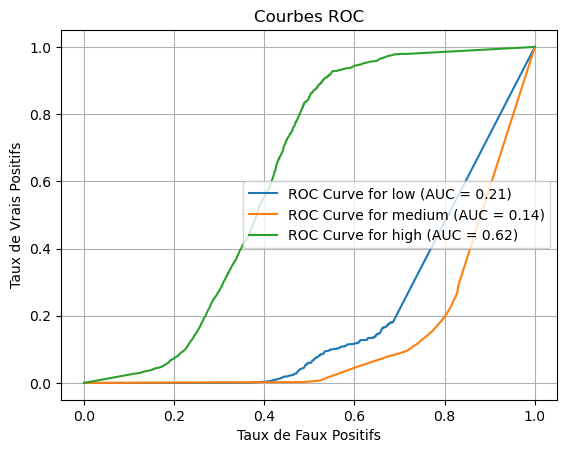

In [44]:
# Courbe ROC
from sklearn.preprocessing import label_binarize
y_test_class_binarized = label_binarize(y_test_class, classes=['low', 'medium', 'high'])
y_scores = dt_classifier.predict_proba(X_test_class)

for i, label in enumerate(['low', 'medium', 'high']):
    fpr, tpr, thresholds = roc_curve(y_test_class_binarized[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f"ROC Curve for {label} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbes ROC")
plt.legend(loc="best")
plt.grid()
plt.show()

### This is the regression models for our data

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entraîner le modèle
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

# Prédictions
y_pred_reg = dt_regressor.predict(X_test_reg)

# Évaluation
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.15
Mean Absolute Error: 0.25
R² Score: 0.65


## 4.7 k-fold Cross-Validation
Step 5 is repeated with a k-fold cross validation with k = 10. Previously, the score only referred to one test data set. Cross-validation generates 10 scores through 10 iterations. The mean value of the scores is then displayed.

In [51]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = dt_classifier, X = X, y = y_classification, cv = 10, n_jobs = 4,
                        return_estimator = True, return_train_score = True)

dfScores = pd.DataFrame.from_dict(scores)
dfScores['test_score'].mean()

0.7971682029117864

Now compare the cross-validation score with the one above. What does the difference tell you? Display the individual scores.

In [52]:
print(dfScores)
test_accuracy = (true_positives + true_negatives) / cm.sum()
print(f"Test set accuracy: {test_accuracy:.2f}")

   fit_time  score_time                                estimator  test_score  \
0  0.727962    0.020423  DecisionTreeClassifier(random_state=10)    0.796678   
1  0.641066    0.020822  DecisionTreeClassifier(random_state=10)    0.799578   
2  0.745631    0.022733  DecisionTreeClassifier(random_state=10)    0.795774   
3  0.742230    0.023241  DecisionTreeClassifier(random_state=10)    0.795021   
4  0.724391    0.023182  DecisionTreeClassifier(random_state=10)    0.798674   
5  0.746427    0.034470  DecisionTreeClassifier(random_state=10)    0.799766   
6  0.889127    0.022746  DecisionTreeClassifier(random_state=10)    0.799382   
7  0.879078    0.030442  DecisionTreeClassifier(random_state=10)    0.786839   
8  0.724019    0.021012  DecisionTreeClassifier(random_state=10)    0.799797   
9  0.564708    0.021698  DecisionTreeClassifier(random_state=10)    0.800173   

   train_score  
0     0.816998  
1     0.817613  
2     0.817061  
3     0.817044  
4     0.817563  
5     0.817157  


### Why should you not test the leave-one-out variant?

In [ ]:
# space
Very high computation time 
High sensitivity to data variations 